<a href="https://colab.research.google.com/github/kutyadog/ai_notebooks/blob/main/SEO_Analysis_ORIG_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiments with SEO tools
In Sept 2023 I started working on an AI SEO Analysis Proof of Concept tool.
These are the initial tests I used when approaching this project.

The goal here was to analyze existing python libraries that could assist me with reliable keyword detection, summarization, and trending data tools to better assist AI in now it could improve story SEO.

The goal:
Examine story headlines and keywords to see if they could be changed out for something that is currently trending. For example, if the current story headline is "Kansas considers legalization", using google trends, we might find that the google query "Marijuana legal in Kansas" is trending, the SEO tool could tell the user that and suggest headlines that contain the trending phrase, such as "Marijuana legal in Kansas? State House considers its options." Or something along those lines (Im not a headline writer).

# Load API Content
Eventually this project would be connected directly to the Wapo Content API. But for this POC, I just copied 5 over stories and use them as static json tests.

In [ ]:
# pip install gdown
!pip install requests_html
!pip install lxml[html_clean]

In [ ]:
!mkdir files
# !gdown 1v-Rn1FVU1pLTAQEgm0N9oB6cExMoebZr -O files/tesla-earnings-report.pdf
!gdown 1y-ep6fDVccO_GW4HpCjIXZwxXQ0lPNQX -O files/content-api-story-1.json #NOT Sure this story is good exxample
!gdown 1MZCWCGHrZNomL3589okgSwffL61_Aj_S -O files/content-api-story-2.json
!gdown 1FTGzOGm9jXIIWu9dcV83GGe3QnF0ri7u -O files/content-api-story-3.json
!gdown 1HBB-lQM1Zea1EE67yWimVXyoHDSLjRR_ -O files/content-api-story-4.json
!gdown 10lZtUWNG6pYsu4l509aLsr0AxZBWUEP6 -O files/content-api-story-5.json
!gdown 1jiAzZ3K-krdrKgkp4zHoIXE5d21YvmYF -O files/Keywords.xlsx


# https://docs.google.com/spreadsheets/d/1jiAzZ3K-krdrKgkp4zHoIXE5d21YvmYF/edit?usp=sharing&ouid=110911785346152112581&rtpof=true&sd=true

In [1]:
import io
import pandas as pd
from google.colab import files

In [2]:
# df = pd.read_json('/content/files/content-api-story-1.json')
story_1 = pd.read_json('/content/files/content-api-story-1.json', lines=True)
story_2 = pd.read_json('/content/files/content-api-story-2.json', lines=True)
story_3 = pd.read_json('/content/files/content-api-story-3.json', lines=True)
story_4 = pd.read_json('/content/files/content-api-story-4.json', lines=True)
story_5 = pd.read_json('/content/files/content-api-story-5.json', lines=True)
# print(story_2._id)


In [ ]:
# @title Installs for Functions below for API Content

!pip install beautifulsoup4     #converting html to text
!pip install yake               #getting keywords
!pip install pytrends
# https://pypi.org/project/pytrends/#suggestions

import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()

In [4]:
# @title Functions to Analyze story from Content API
from bs4 import BeautifulSoup

def get_full_story_content_api(storyObject):
  full_story = []
  for item in storyObject.content_elements[0]:
    if item['type'] == 'text':
      full_story.append(item['content'])
    # print(item['type'])

  soup = BeautifulSoup(",".join(str(x) for x in full_story))
  full_text = soup.get_text()
  return full_text


def analyze_headline_length(headlineString):
    string_length = len(headlineString)
    rating = "red"
    suggestion = "Ideally keep headline at 70 chars maximum."
    if string_length < 70:
        rating =  "green"
        suggestion = "Looks good."
    elif string_length >= 71 and string_length < 80:
        rating =  "yellow"

    return { "rating": rating, "suggestion": suggestion }

def analyze_description_length(descriptionString):
    string_length = len(descriptionString)
    rating = "red"
    suggestion = "Ideally keep description between 50-160 characters."
    if string_length <= 160 and string_length >= 50:
        rating =  "green"
        suggestion = "Looks good."
    elif string_length >= 161 and string_length < 180:
        rating =  "yellow"

    return { "rating": rating, "suggestion": suggestion }


In [5]:
# @title Functions for Content API Interactions





full_story_text = get_full_story_content_api(story_4)
full_story_text
# story_4.content_elements[0][0]['_id']

'The troubled rollout of updated coronavirus vaccines is proving especially challenging for physicians and parents seeking to immunize children — a reflection of distribution delays, shortages at pharmacies and financial obstacles confronting pediatric practices.,The federal government is no longer buying and distributing all vaccines, unleashing a host of complications as the new shots, recommended for everyone older than 6 months, hit the private market in mid-September. The updated vaccine is tailored to provide a shield of protection against coronavirus variants in circulation and arrives as the fall respiratory illness season dawns and an expected winter covid uptick looms.,The issues have been pronounced for pediatric vaccines, which come in different dose size and packaging.,Elias Kass, a Seattle-area provider, said he sees a disconnect between federal officials stressing the importance of getting vaccinated and the experiences of his patients, who must reschedule appointments b

# Tools libraries
For true SEO I will need tools to summarize, simplify, pull out keywords, etc.
The following are tests for various libraries for these tasks.



In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
import spacy

In [7]:
# text = """spaCy is an open-source software library for advanced natural language processing,
# written in the programming languages Python and Cython. The library is published under the MIT license
# and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""

tokens = nltk.word_tokenize(full_story_text)

nlp = spacy.load("en_core_web_sm")
doc = nlp(full_story_text)
print(nlp)
print(doc.ents)

keywords = [ent.text for ent in doc.ents if ent.label_ == "NOUN"]
print(keywords)

# tagged = nltk.pos_tag(tokens)
# tagged[0:6]

(older than 6 months, mid-September, season, winter, Seattle, last week, the last week, two, months ago, ”,Mandy Cohen, the Centers for Disease Control and Prevention, first, first, Cohen, Thursday, Americans, 6 months, younger than 5, covid-19, fewer than 1, 5, CDC, Moderna, Moderna, younger than 5, CDC, younger than 5, one, two, Moderna, Pfizer, German, Leonardi, two, Pittsburgh, 4-year-old, Juliet, second, Moderna, more than 250, Juliet, all-day, pre-K, Juno, Walgreens, Moderna, Leonardi, last week, one, one, Moderna, ,Pediatricians, Pfizer, 6 months to 4 years, Moderna, three, the same day, first, Pfizer, May 2024.,“Pediatricians, Sandy Chung, the American Academy of Pediatrics, CDC, Wednesday, Pfizer, Kit Longley, 60 days, Longley, hundreds of millions, Americans, Health and Human Services, Xavier Becerra, Wednesday, the initial days, Chugani, two, Pfizer, Friday, Oct. 14, one, Chugani, South, RSV, Chugani, the school year, Seattle, Kass, Moderna, a week ago, two, Late Thursday, n

In [8]:
import yake
kw_extractor = yake.KeywordExtractor()
# text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 30
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(full_story_text)
for kw in keywords:
    print(kw)

('updated coronavirus vaccines', np.float64(0.010838750511872372))
('Moderna pediatric doses', np.float64(0.013070007421103069))
('vaccine', np.float64(0.014769399784665073))
('coronavirus vaccine', np.float64(0.014969415659372822))
('financial obstacles confronting', np.float64(0.01630613470158482))
('vaccines', np.float64(0.017041615136152006))
('confronting pediatric practices.', np.float64(0.020478255249092404))
('obstacles confronting pediatric', np.float64(0.02106107006596324))
('coronavirus', np.float64(0.021250724856017044))
('Moderna', np.float64(0.02356186248882404))
('updated coronavirus', np.float64(0.02938710711766635))
('doses', np.float64(0.029951233841775206))
('pediatric', np.float64(0.030253096186127613))
('children', np.float64(0.030995540696199655))
('Moderna pediatric', np.float64(0.0342757880146348))
('Coronavirus vaccine uptake', np.float64(0.03464010787937558))
('pediatric vaccines', np.float64(0.03591889812051832))
('pediatric doses', np.float64(0.0369024898068

# Google Trends Analysis and Suggestions

In [9]:
# @title Helpful func for top queries and related queries

# from: https://colab.research.google.com/github/FrontAnalyticsInc/data-winners/blob/main/analysis-trends/trends-and-forecasts.ipynb#scrollTo=c02a85f6

#install pytrends


#import the libraries
import pandas as pd
from pytrends.request import TrendReq
from datetime import datetime, timedelta

# use custom header
requests_args = {
    'headers': {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    }
}


# --- code 2

# pytrend = TrendReq(requests_args=requests_args)

# #get today's treniding topics
# # trendingtoday = pytrend.today_searches(pn='US')
# trendingtoday = TrendReq(hl='en-US', tz=360)

# # Get Google Top Charts
# for querystring in trendingtoday:
#     q = querystring.split("q=")[1].split("&")[0].replace("+"," ")
#     print(q)




# --- code 3

#build model
pytrend = TrendReq(requests_args=requests_args)

#provide your search terms
kw_list=['"vaccine for children"']
pytrend.build_payload(kw_list=kw_list)


#get related queries
related_queries = pytrend.related_queries()
related_queries.values()

#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]:
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx)
                                     if d_idx != 0
                                     else dup
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names
allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True)

# --- code 4

allqueries.head(50)


""


In [10]:
# print the master list
for keyword in range(len(allqueries)):
    print(allqueries.iloc[keyword]['top query'])

    # for each query
    for related_query in allqueries.iloc[keyword]['related query'].split(","):
        print( related_query.strip() )

In [19]:
# @title functions
import urllib
import urllib.parse
import json
from urllib.parse import (parse_qsl, urlsplit)
import requests
from requests_html import HTMLSession
# def get_alt_queriesOrig(keywordString):
#     pytrend.build_payload(kw_list=[keywordString])
#     return related_queries[keywordString]['top']
#     # return results

def get_alt_queries(keywordArray):
    # pytrend = TrendReq()
    # pytrend.build_payload(kw_list=[keywordString])
    pytrend.build_payload(kw_list=searchTerm,timeframe='today 1-m',geo='US')
    related_queries = pytrend.related_queries();
    xList = [];
    for keyword in searchTerm:
      xList.append(pd.DataFrame(pd.DataFrame(related_queries[keyword]['top'])))



    # pytrend.build_payload(kw_list=keywordArray,timeframe='today 1-m',geo='US')
    # related_queries = pytrend.related_queries();
    # xList = [];
    # for index, value in keywordArray:
    #   suggestion = {'term': value, 'relevance': results[4]['google:suggestrelevance'][index]}
    #   xList.append(related_queries[value]['top'])
    return xList
    # return pytrend.related_queries()
    # return related_queries[keywordString]['top']
    # return results

# kw=['marijuana', 'weed', 'pot', 'cannabis']
# pytrends.build_payload(kw_list=kw,timeframe='today 1-m',geo='US')
# pytrends.related_queries()

def get_source(url):
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_results(query):
    query = urllib.parse.quote_plus(query)
    response = get_source("https://suggestqueries.google.com/complete/search?output=chrome&hl=en&q=" + query)
    results = json.loads(response.text)
    return results

def format_results(results):
    suggestions = []
    for index, value in enumerate(results[1]):
        suggestion = {'term': value, 'relevance': results[4]['google:suggestrelevance'][index]}
        suggestions.append(suggestion)
    return suggestions

def get_related_queries(search_term):
  results = get_results(search_term)
  formatted_results = format_results(results)
  return pd.DataFrame(formatted_results)


In [16]:
searchTerm = ['vaccine for children']

altQuery = get_alt_queries(searchTerm)
altQuery

pytrend.build_payload(kw_list=searchTerm,timeframe='today 1-m',geo='US')
related_queries = pytrend.related_queries();
xList = [];
for keyword in searchTerm:
   xList.append(pd.DataFrame(pd.DataFrame(related_queries[keyword]['top'])))

xList

[                                      query  value
 0                     vaccines for children    100
 1                covid vaccine for children     85
 2            cvs covid vaccine for children     27
 3                  rsv vaccine for children     18
 4              vaccine for children program     18
 5  johnson and johnson vaccine for children     12
 6              vaccine for children near me      6]

In [17]:
kw=['mouse']
pytrend.build_payload(kw_list=kw,timeframe='today 1-m',geo='US')
pytrend.related_queries()

{'mouse': {'top':                      query  value
  0             mickey mouse    100
  1                 keyboard     50
  2             minnie mouse     38
  3       keyboard and mouse     34
  4           wireless mouse     33
  5           logitech mouse     27
  6                 logitech     27
  7             gaming mouse     25
  8                mouse pad     21
  9   mickey mouse clubhouse     19
  10          mouse computer     13
  11              mouse trap     13
  12             house mouse     12
  13         bluetooth mouse     12
  14             apple mouse     11
  15             magic mouse      9
  16            modest mouse      8
  17             razer mouse      8
  18                     rat      8
  19                   razer      8
  20              baby mouse      8
  21              mini mouse      8
  22            mouse cursor      7
  23             mouse traps      7
  24           mouse control      6,
  'rising':                          query  val

In [20]:
searchTerm

relatedQuery = get_related_queries(searchTerm[0])   #a dataframe
relatedQuery.head(10)

,term,relevance
0,vaccine for children program,1250
1,vaccine for children schedule,601
2,vaccine for children near me,600
3,vaccine for children (vfc) program,561
4,vaccine for children program requirements,560
5,vaccine for children side effects,559
6,vaccine for children age limit,558
7,vaccine for children training,557
8,vaccine for children program provider agreement,556
9,vaccine for children administration fee,555


In [21]:
# @title

# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='vaccine for children')

df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,The Peanut Allergy Epidemic: What's Causing It...,Book by Heather Fraser
1,Vax Facts: What to Consider Before Vaccinating...,Book by DeeDee Hoover and Paul Thomas
2,Paul Thomas,Author
3,Pediatric Inflammatory Bowel Disease,Book
4,Erin Marie Olszewski,Journalist


# Not as important Google Queries

In [22]:
# @title Interest by Region
pytrend.build_payload(kw_list=['marijuana'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,marijuana
geoName,
Alabama,41
Alaska,65
Arizona,59
Arkansas,83
California,39
Colorado,71
Connecticut,61
Delaware,62
District of Columbia,45


<Axes: xlabel='geoName'>

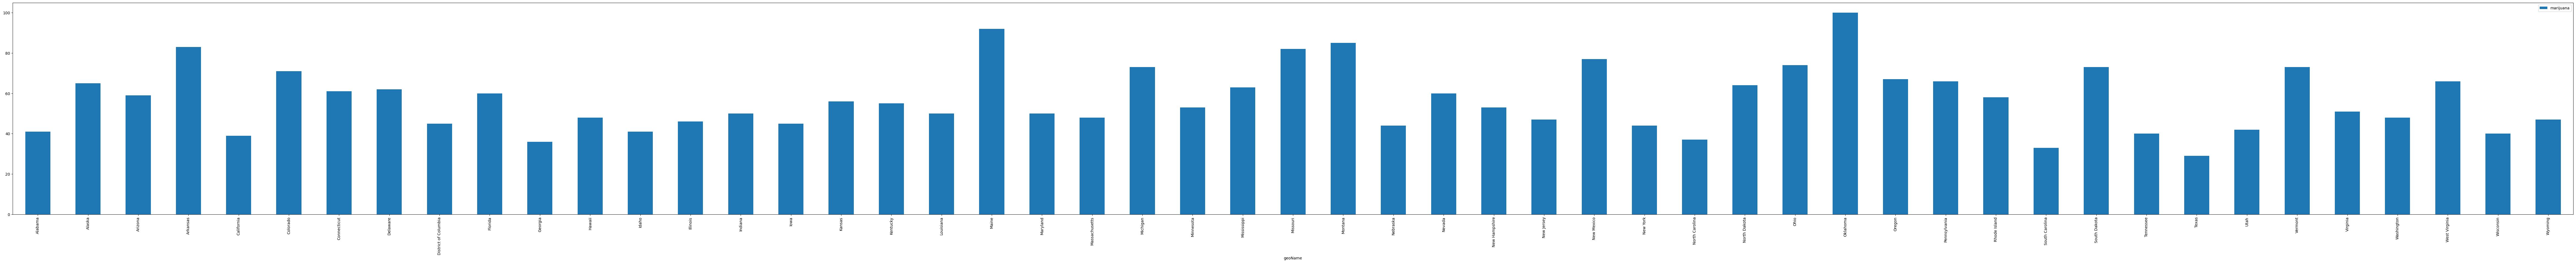

In [23]:

df.reset_index().plot(x='geoName', y='marijuana', figsize=(120, 10), kind ='bar')
# resolution = 'COUNTRY_NAME'

In [ ]:
df = pytrend.trending_searches(pn='united_states')
df.head()

In [ ]:
df = pytrend.today_searches(pn='US')

In [ ]:
# Get Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

In [ ]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='lightbulb')

df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Ingenious,2009 American film
1,Young Thomas Edison,Book by Michael Dooling
2,Timeless Thomas: How Thomas Edison Changed Our...,Book by Gene Barretta
3,Kindness Starts With You - At School,Book by Jacquelyn Stagg
4,Lightbulb socket,Topic


In [28]:
# @title Finding good suggestions
pytrend.build_payload(kw_list=['marijuana'])
# Up to five terms in a list: ['Pizza', 'Italian', 'Spaghetti', 'Breadsticks', 'Sausage']

In [31]:
type(related_queries)
related_queries.keys()
related_queries['vaccine for children']['top']


,query,value
0,vaccines for children,100
1,covid vaccine for children,85
2,cvs covid vaccine for children,27
3,rsv vaccine for children,18
4,vaccine for children program,18
5,johnson and johnson vaccine for children,12
6,vaccine for children near me,6


In [32]:

# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                            query  value
0              medical marijuana    100
1           marijuana dispensary     44
2                     dispensary     44
3                           weed     39
4                 marijuana card     37
5              what is marijuana     35
6              marijuana near me     33
7         medical marijuana card     28
8         recreational marijuana     25
9                marijuana plant     17
10                      cannabis     15
11        marijuana dispensaries     15
12  marijuana dispensary near me     14
13            dispensary near me     14
14                           thc     13
15               marijuana seeds     13
16                ohio marijuana     13
17        marijuana legalization     12
18              marijuana plants     12
19           marijuana drug test     11
20  medical marijuana dispensary     10
21     medical marijuana near me      8
22             federal marijuana      8
23     medical mari

In [ ]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
# related_topic.values()

In [ ]:
# from datetime import date

# pytrend.top_charts(2023, hl='en-US', tz=300, geo='GLOBAL')
# df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='US')
# df.head()

df = pytrend.realtime_trending_searches(pn='US')
df

In [39]:
# @title Related Queries from Google Autosuggest

def get_source(url):

    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_results(query):
    query = urllib.parse.quote_plus(query)
    response = get_source("https://suggestqueries.google.com/complete/search?output=chrome&hl=en&q=" + query)
    results = json.loads(response.text)
    return results

In [40]:
lang_code = "en-gb"
search_term = "marijuana "
results = get_results(search_term)
results

['marijuana ',
 ['marijuana dispensary near me',
  'marijuana seeds',
  'marijuana plant',
  'marijuana dispensary',
  'marijuana withdrawal symptoms',
  'marijuana legalization',
  'marijuana seeds for sale',
  'marijuana leaf',
  'marijuana doctor',
  'marijuana rescheduling',
  'marijuana registry',
  'marijuana news',
  'marijuana moment',
  'marijuana stores near me',
  'marijuana anonymous'],
 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 [],
 {'google:clientdata': {'bpc': False, 'tlw': False},
  'google:suggestrelevance': [950,
   601,
   600,
   561,
   560,
   559,
   558,
   557,
   556,
   555,
   554,
   553,
   552,
   551,
   550],
  'google:suggestsubtypes': [[512],
   [512, 433],
   [512, 433],
   [512, 433],
   [512, 433],
   [512, 433, 131],
   [512],
   [512, 433],
   [512, 433],
   [512, 433, 131],
   [512],
   [512, 433, 131],
   [512, 433, 131],
   [512],
   [512, 433]],
  'google:suggesttype': ['QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUE

In [41]:
def format_results(results):
    suggestions = []
    for index, value in enumerate(results[1]):
        suggestion = {'term': value, 'relevance': results[4]['google:suggestrelevance'][index]}
        suggestions.append(suggestion)
    return suggestions

formatted_results = format_results(results)
formatted_results

# “Relevance” refers to an automated estimation based on the
#     frequency that specific term is subjected to in the search results page

[{'term': 'marijuana dispensary near me', 'relevance': 950},
 {'term': 'marijuana seeds', 'relevance': 601},
 {'term': 'marijuana plant', 'relevance': 600},
 {'term': 'marijuana dispensary', 'relevance': 561},
 {'term': 'marijuana withdrawal symptoms', 'relevance': 560},
 {'term': 'marijuana legalization', 'relevance': 559},
 {'term': 'marijuana seeds for sale', 'relevance': 558},
 {'term': 'marijuana leaf', 'relevance': 557},
 {'term': 'marijuana doctor', 'relevance': 556},
 {'term': 'marijuana rescheduling', 'relevance': 555},
 {'term': 'marijuana registry', 'relevance': 554},
 {'term': 'marijuana news', 'relevance': 553},
 {'term': 'marijuana moment', 'relevance': 552},
 {'term': 'marijuana stores near me', 'relevance': 551},
 {'term': 'marijuana anonymous', 'relevance': 550}]

In [43]:
kw=['marijuana', 'weed', 'pot', 'cannabis']
pytrend.build_payload(kw_list=kw,timeframe='today 1-m',geo='US')
pytrend.related_queries()

{'marijuana': {'top':                                 query  value
  0                   medical marijuana    100
  1                marijuana dispensary     47
  2                          dispensary     46
  3                   what is marijuana     38
  4                      marijuana card     37
  5                   marijuana near me     33
  6              medical marijuana card     29
  7                                weed     29
  8              recreational marijuana     25
  9                     marijuana plant     18
  10                           cannabis     15
  11                 dispensary near me     13
  12       marijuana dispensary near me     13
  13             marijuana dispensaries     13
  14       medical marijuana dispensary     10
  15          medical marijuana florida     10
  16                   marijuana doctor      9
  17                     marijuana news      8
  18                    marijuana seeds      7
  19          medical marijuana near me 

# Keyword Clusterization
From [Here](https://seodepths.com/python-for-seo/semantic-market-analysis-for-seo/)

In [ ]:
!pip install google-search-results
!pip install pytrends
!pip install requests_html

In [48]:
#scraping
import requests
from serpapi import GoogleSearch
import urllib
import urllib.parse
import json
from urllib.parse import (parse_qsl, urlsplit)
from requests_html import HTML
from requests_html import HTMLSession

#data manipulation
import pandas as pd
import numpy as np

#data viz
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style("whitegrid")
# plt.set_style("whitegrid")
sns.set_style("white")
%matplotlib inline

In [49]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-GB', tz=360, timeout=(5,15))

In [50]:
colnames = ["keywords"]
df = pd.read_excel("/content/files/Keywords.xlsx", names=colnames)
df2 = df["keywords"].values.tolist()

In [51]:
df2

['marijuana', 'weed', 'pot', 'cannabis']

In [52]:
dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrends.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2023-09-2 2023-10-2',
     geo='US')
     data = pytrends.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

# https://pypi.org/project/pytrends/

# Two letter country abbreviation
# For example United States is 'US'
# Defaults to World
# More detail available for States/Provinces by specifying additional abbreviations
# For example: Alabama would be 'US-AL'
# For example: England would be 'GB-ENG'

In [53]:
result = pd.concat(dataset, axis=1)
result.to_csv('search_trends.csv')
result.head()

,marijuana,weed,pot,cannabis
date,,,,
2023-09-02,91,99,68,94
2023-09-03,100,100,76,92
2023-09-04,90,97,75,90
2023-09-05,83,75,58,100
2023-09-06,83,72,57,94


<Axes: xlabel='Time', ylabel='Trends'>

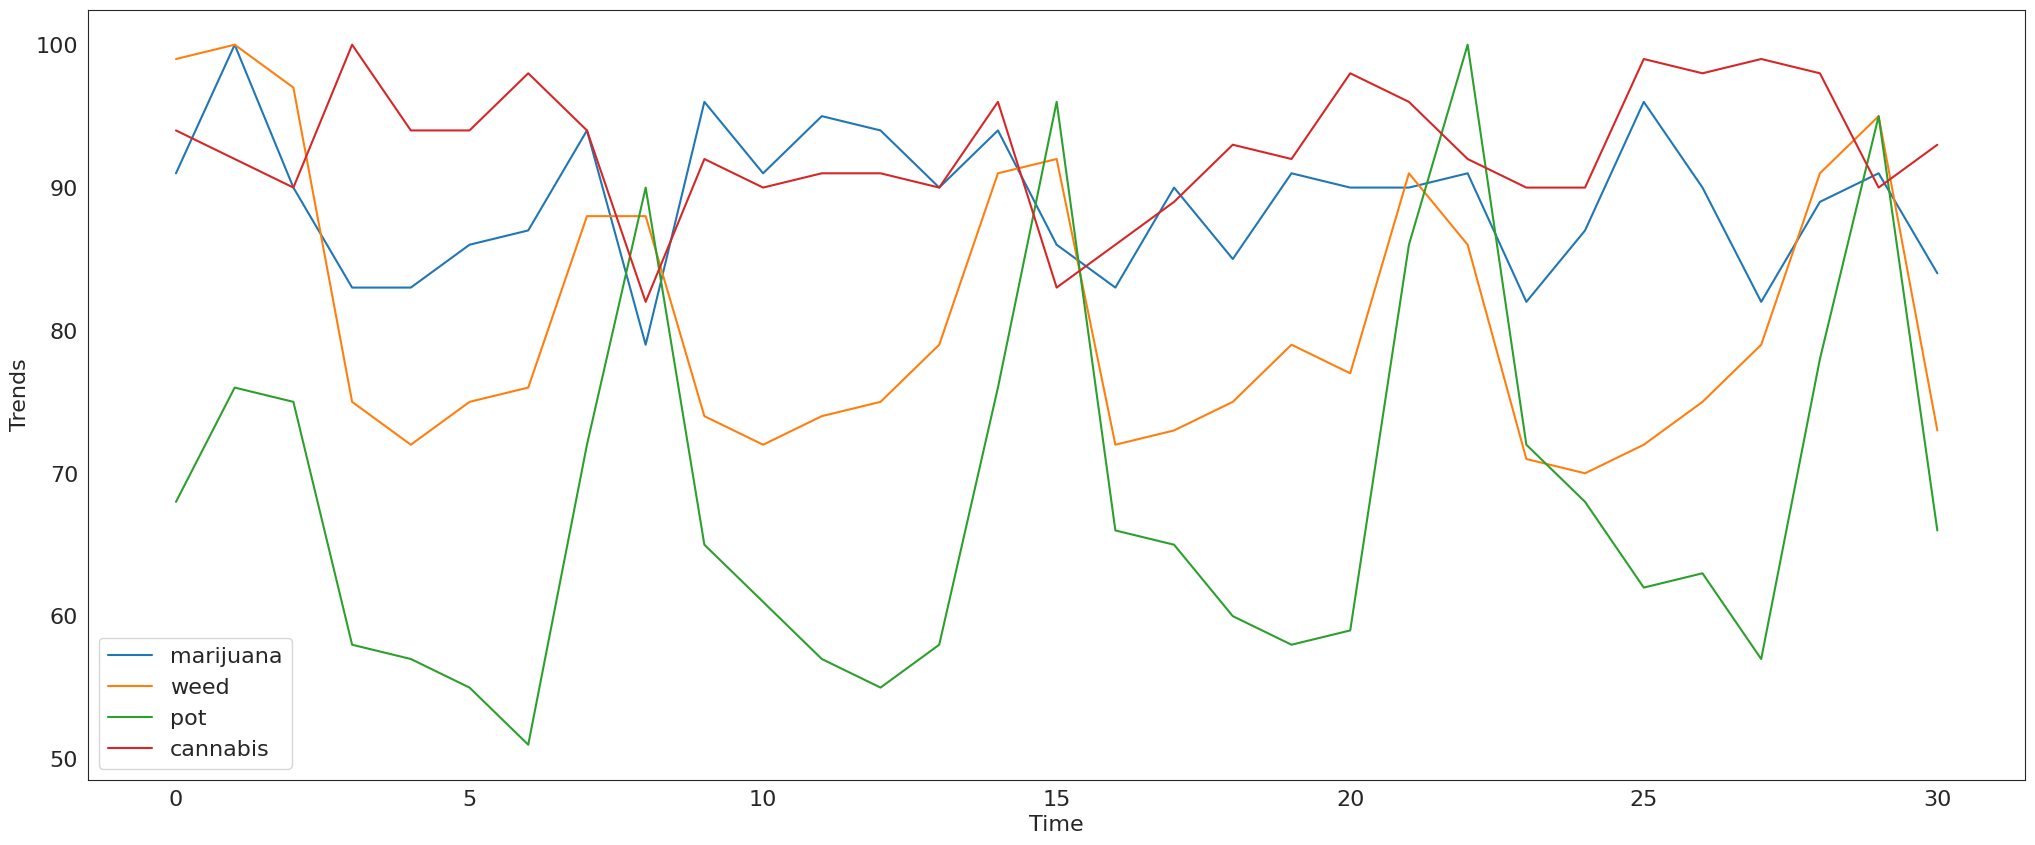

In [54]:
df = pd.read_csv(r'/content/search_trends.csv')
df.plot(xlabel="Time", ylabel="Trends",figsize=(25,10), kind="line")

In [55]:
# @title Kick-Off Entity Research

keywords = pytrends.suggestions('marijuana')

df = pd.DataFrame(keywords)

cols = ['mid', 'Entity', 'Meaning']

df.columns = cols

df = df.drop("mid",axis=1)

df


,Entity,Meaning
0,Cannabis,Drug
1,Cannabis indica,Plant
2,Cannabis sativa,Plant
3,Hemp,Plant
4,Burning Rainbow Farm: How a Stoner Utopia Went...,Book by Dean Kuipers


In [56]:
# @title Related Queries from Google Autosuggest

def get_source(url):

    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_results(query):
    query = urllib.parse.quote_plus(query)
    response = get_source("https://suggestqueries.google.com/complete/search?output=chrome&hl=en&q=" + query)
    results = json.loads(response.text)
    return results

In [57]:
lang_code = "en-gb"
search_term = "marijuana "
results = get_results(search_term)
results

['marijuana ',
 ['marijuana dispensary near me',
  'marijuana seeds',
  'marijuana plant',
  'marijuana dispensary',
  'marijuana withdrawal symptoms',
  'marijuana legalization',
  'marijuana seeds for sale',
  'marijuana leaf',
  'marijuana doctor',
  'marijuana rescheduling',
  'marijuana news',
  'marijuana moment',
  'marijuana stores near me',
  'marijuana anonymous',
  'marijuana legal states'],
 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 [],
 {'google:clientdata': {'bpc': False, 'tlw': False},
  'google:suggestrelevance': [950,
   601,
   600,
   561,
   560,
   559,
   558,
   557,
   556,
   555,
   554,
   553,
   552,
   551,
   550],
  'google:suggestsubtypes': [[512],
   [512, 433],
   [512, 433],
   [512, 433],
   [512, 433],
   [512, 433, 131],
   [512],
   [512, 433],
   [512, 433],
   [512, 433, 131],
   [512, 433, 131],
   [512, 433, 131],
   [512],
   [512, 433],
   [512, 433]],
  'google:suggesttype': ['QUERY',
   'QUERY',
   'QUERY',
   'QUERY'

In [58]:
def format_results(results):
    suggestions = []
    for index, value in enumerate(results[1]):
        suggestion = {'term': value, 'relevance': results[4]['google:suggestrelevance'][index]}
        suggestions.append(suggestion)
    return suggestions

formatted_results = format_results(results)
formatted_results

# “Relevance” refers to an automated estimation based on the
#     frequency that specific term is subjected to in the search results page

[{'term': 'marijuana dispensary near me', 'relevance': 950},
 {'term': 'marijuana seeds', 'relevance': 601},
 {'term': 'marijuana plant', 'relevance': 600},
 {'term': 'marijuana dispensary', 'relevance': 561},
 {'term': 'marijuana withdrawal symptoms', 'relevance': 560},
 {'term': 'marijuana legalization', 'relevance': 559},
 {'term': 'marijuana seeds for sale', 'relevance': 558},
 {'term': 'marijuana leaf', 'relevance': 557},
 {'term': 'marijuana doctor', 'relevance': 556},
 {'term': 'marijuana rescheduling', 'relevance': 555},
 {'term': 'marijuana news', 'relevance': 554},
 {'term': 'marijuana moment', 'relevance': 553},
 {'term': 'marijuana stores near me', 'relevance': 552},
 {'term': 'marijuana anonymous', 'relevance': 551},
 {'term': 'marijuana legal states', 'relevance': 550}]

Right, now we’ve got our large set of connections to “Coffee”. Yet we should probably craft our findings based on our use cases.

Let’s start by spicing up the list with a few suffixes

In [59]:
def get_expanded_term_suffixes():
    expanded_term_suffixes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm','n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    return expanded_term_suffixes

So we can add a Keyword Modifier to provide a search intent angle to our list of queries

In [60]:
def get_expanded_term_prefixes():
    expanded_term_prefixes = ['what *', 'where *', 'how to *', 'why *', 'buy*', 'how much*','best *', 'worse *', 'rent*', 'sale*', 'offer*','vs*','or*'
                             ]
    return expanded_term_prefixes

Here’s a refresh of which modifiers can tweak your content angle to shape the search intent:

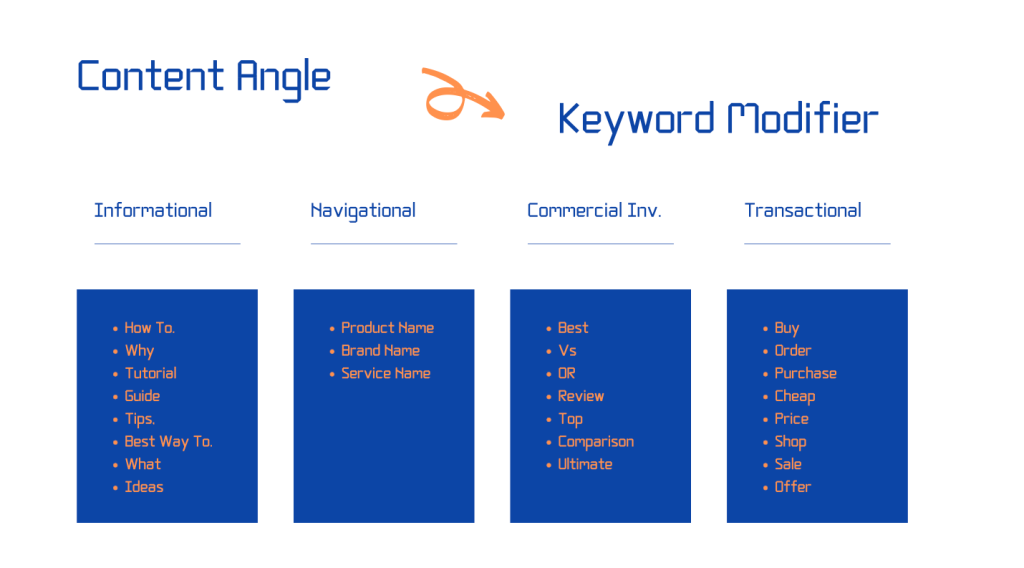

Next, we expand the range of searches on Google Autosuggest to make sure we can collect as many results as possible

In [61]:
def get_expanded_terms(query):

    expanded_term_prefixes = get_expanded_term_prefixes()
    expanded_term_suffixes = get_expanded_term_suffixes()

    terms = []
    terms.append(query)

    for term in expanded_term_prefixes:
        terms.append(term + ' ' + query)

    for term in expanded_term_suffixes:
        terms.append(query + ' ' + term)

    return terms

#Look for further suggestions

def get_expanded_suggestions(query):

    all_results = []

    expanded_terms = get_expanded_terms(query)
    for term in expanded_terms:
        results = get_results(term)
        results = format_results(results)
        all_results = all_results + results
        all_results = sorted(all_results, key=lambda k: k['relevance'], reverse=True)
    return all_results

After a bit of data cleaning, we can download the output with the results.

In [62]:
expanded_results = get_expanded_suggestions(search_term)
expanded_results_df = pd.DataFrame(expanded_results)
expanded_results_df.columns = ['Keywords', 'Relevance']
expanded_results_df.to_csv('results.csv')
pd.set_option('display.max_rows',expanded_results_df.shape[0]+1)
expanded_results_df.drop_duplicates('Keywords')
expanded_results_df

,Keywords,Relevance
0,marijuana rescheduling,1251
1,marijuana dispensary near me,1250
2,marijuana gummies,1250
3,marijuana jobs,1250
4,marijuana moment,1250
5,marijuana news,1250
6,marijuana plant,1250
7,marijuana registry,1250
8,marijuana seeds,1250
9,marijuana use,1250


If you want to be more granular, you can check those queries that are below the 80th quantile of the query dataset for Relevance.

In layman’s terms, we are filtering out all the fat-head entities to focus on more granular queries deemed as less relevant than the top 20% of the dataset but likely more approachable in your strategy.

In [63]:
top_relevance = expanded_results_df[expanded_results_df['Relevance'] <= expanded_results_df['Relevance'].quantile(0.8)]
top_relevance.to_csv('top relevance.csv')
top_relevance

,Keywords,Relevance
92,marijuana plant,600
93,what marijuana is legal in florida,600
94,where marijuana is legal in europe,600
95,how to marijuana gummies,600
96,why marijuana should be legalized,600
97,buy marijuana plants near me,600
98,how much marijuana is in a joint,600
99,best marijuana seeds,600
100,worst marijuana strains,600
101,renton marijuana,600


Looking at the array, “what coffee is good for weight loss” sounds like a captivating search query disclosing a plethora of topics.

I note down this query as it will turn out useful later on.

In [ ]:
# @title Keyword Clusterization

!pip install fuzzywuzzy
!pip install plotly
!pip install gensim

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

#Open the Output
df = pd.read_csv('results.csv')
text1 = df['Keywords']


**Preprocessing**

Within the Preprocessing stage of the analysis, also known as Tokenization, we remove unnecessary characters and words from the query text to only keep the meaningful values.

In [ ]:
#Remove stopwords, punctuation and numbers
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]

#Stem and make lower case
def stemSentence(sentence):
    stemmer = SnowballStemmer('english')
    token_words = word_tokenize(sentence)
    stem_sentence = [stemmer.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

text3 = pd.Series([stemSentence(x) for x in text2])

In [ ]:
text3

**Vector Queries**

Vectorisation is the process of turning cleaned text into numerical data so that we can perform statistical analysis on it. Again, there are plenty of techniques to choose from.

In [ ]:
#Bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text3)

#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text3)

#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text3)

# https://towardsdatascience.com/clustering-product-names-with-python-part-2-648cc54ca2ac

**Vectorisation with Topic Modelling**

The Latent Dirichlet Allocation (LDA) is a probabilistic unsupervised learning model typically used as a threshold for Topic Modelling tasks. The idea behind the algorithm is to parse multiple words in a document to probabilistically estimate the topics. Essentially, the algorithm assumes each text corpora is made up of several topics and similar topics use similar words.

Here is the result for 30 topics and the top 5 words per topic extracted from the original dataset of scraped queries.

In [ ]:
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()



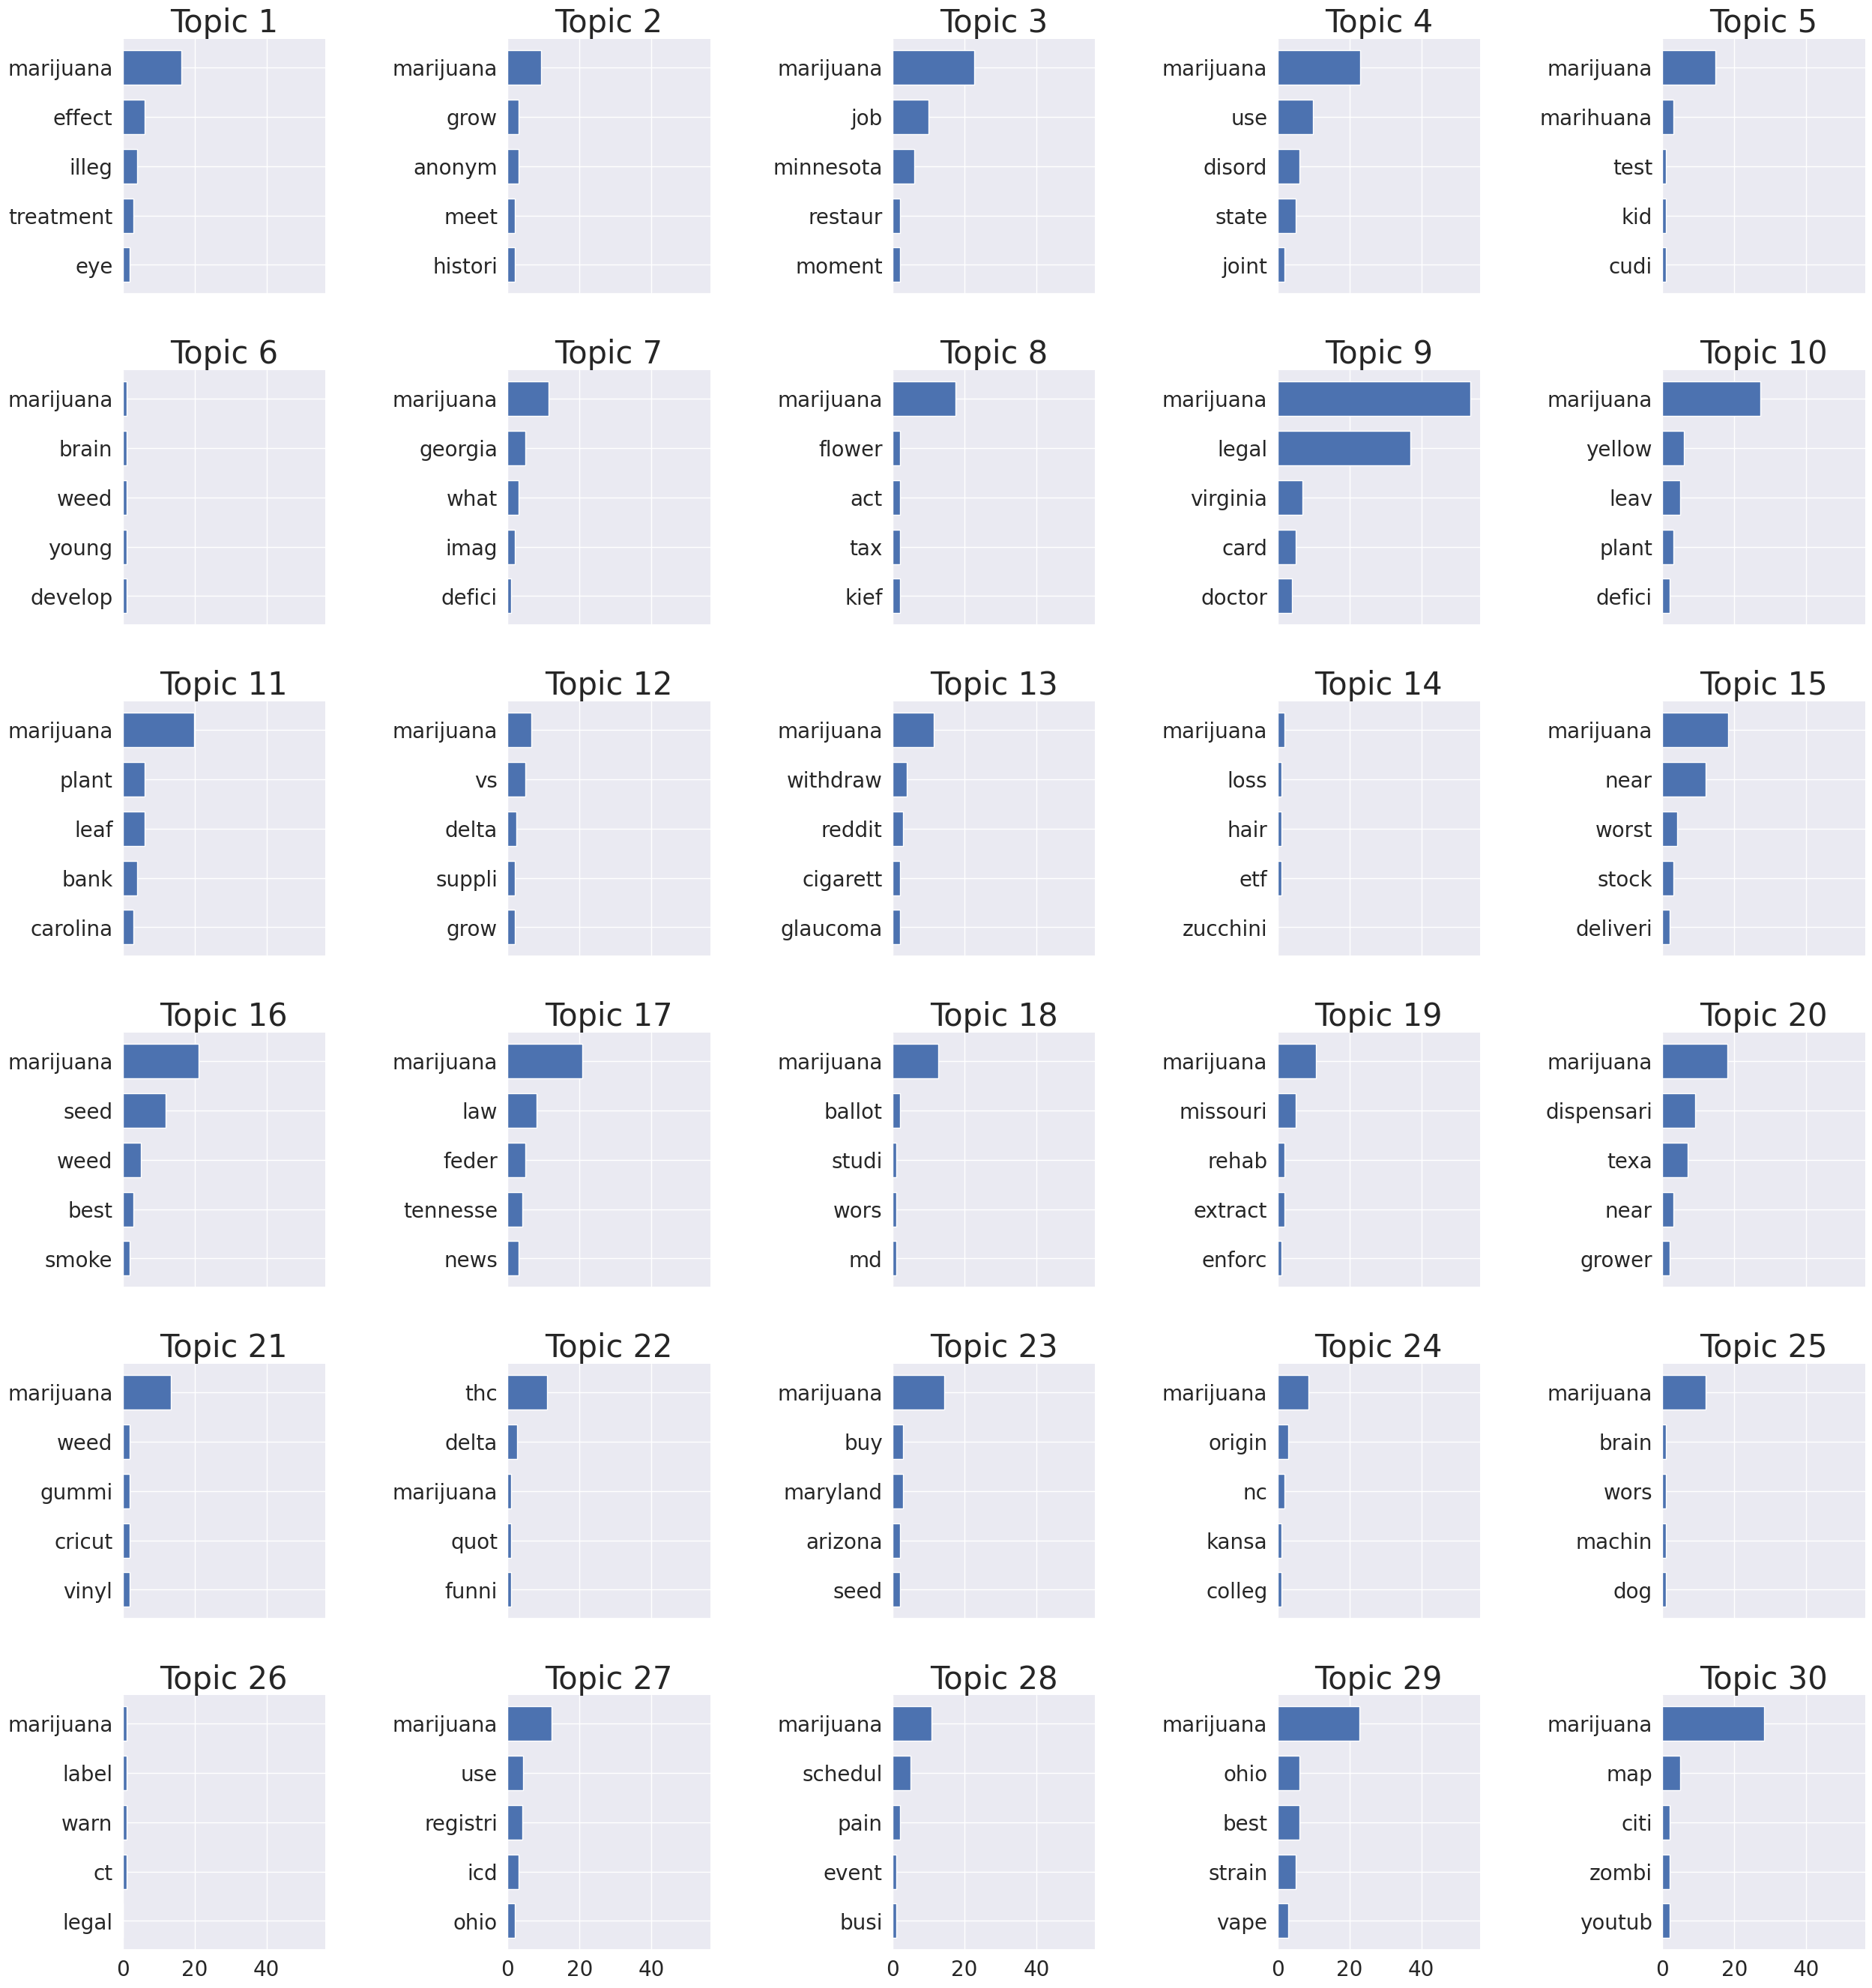

In [ ]:
#Show topics
n_top_words = 5

feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(X_lda, feature_names, n_top_words, '')

**Vectorisation with Topic Similarity**

The last stage of vectorisation is to calculate a similarity score between two strings. Fuzzywuzzy applies the fuzzy matching calculation of similarity between strings worded slightly differently and returns a similarity score.

Here is a matrix showcasing each coffee query and its similarity score with every other coffee word. Please note that the similarity score ranges from 0-100.

In [ ]:
X_fuzz = pd.crosstab([text3.index,text3],text3).apply(lambda col: [fuzz.token_sort_ratio(col.name, x)
                                                                   for x in col.index.get_level_values(1)])
X_fuzz.head()

,col_0,best marijuana migrain,best marijuana pain,best marijuana seed,best marijuana seed bank,best marijuana stock,best marijuana strain,best marijuana strain anxieti,buy marijuana maryland,buy marijuana minnesota,buy marijuana seed australia reddit,...,what marijuana use disord,what thc p,what thco,worst marijuana,worst marijuana law,worst marijuana law world,worst marijuana state,worst marijuana stock,worst marijuana strain,worst type marijuana
row_0,row_1,,,,,,,,,,,,,,,,,,,,,
0,marijuana reschedul,54,53,68,60,62,55,46,59,57,56,...,50,14,7,71,63,55,60,60,54,62
1,marijuana dispensari near,60,64,64,53,58,61,52,55,58,50,...,68,23,12,55,59,52,52,48,47,53
2,marijuana gummi,54,59,59,51,57,56,50,59,58,48,...,55,16,17,60,59,50,50,50,49,51
3,marijuana kansa,59,65,65,67,63,61,59,54,53,52,...,55,16,17,60,65,55,50,50,49,51
4,marijuana legal,59,65,65,56,63,61,50,54,53,48,...,50,16,17,60,71,60,50,50,49,51


**Cluster Analysis with K-means**

About time to get deep to the core of the cluster analysis.

What we have to do is to specify the number of clusters and the algorithm will assign each observation to a cluster until each cluster’s observations are as close as possible to its mean (centroid)

To define such a number, we assign K-means (K) to each occurrence

> K-means is a machine learning algorithm typically employed in unsupervised learning for clustering problems.


**K-Means Clustering: How Does it Work?**

K-means is an unsupervised machine learning model, hence it requires a few manual prompts to get started.

Just for your information, here’s the roadmap implicated in the K-Means process.

Prompt	Description
1	Select the number of clusters you want to identify

2	The Kmeans algorithm will select a number of random data points (centroids)that match the number of clusters.

3	The algorithm calculates the distances between each point(centroids) to each cluster point

4	Within each cluster, the algorithm starts to identify the closest data points in its range (internal clustering)

5	Calculate the mean of each cluster and assign it to the new cluster centroid

6	Redefine clusters, thereby assigning a new mean as the next cluster centroid

7	Rinse and repeat the process as long as you identify clusters that minimize errors (SSE)

> SSE [Distortion] refers to the distance of all points within a cluster from the centroid of other points. In other words, SSE stands for the difference between the observed value and the predicted value

**The Elbow Method**

Some of you may claim that you can’t improvise to draw a feasible number of clusters to assign to the K-means. What is Data Science all for by the way?

There is, in fact, a method that will help us select the optimal number of clusters according to the number of occurrences in our entity dataset.

The Elbow method defines a range of K values to run k-means clustering on and evaluates the SSE (Distortion) for the model using each of the defined numbers of clusters.

The Elbow Method, as the name suggests, will provide a breaking scree plot. The data point where the plot cracks represent the number of clusters that you’d be better picking up

The best data source to apply the Elbow method is probably our bespoke Bag of Words as it encloses a count of word occurrences

But how many words did we find within the Related Entity dataset?

In [ ]:
text3.count()

487

Once we know how many samples we picked up, we can finally apply the Elbow Method by assigning it to n_sample= the number generated from the Bag of words

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#setting the model
features, labels = make_blobs(
    n_samples=320,
    centers=15
)

# Instanciate the model by assigning the K-means a hypothetical number of clusters
# and 10 iterations with different centroid seed
model = KMeans(
    n_clusters=10,
    n_init=10,
    random_state=42
    )

# train the model
model.fit(features)

# make a prediction on the data
p_labels = model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



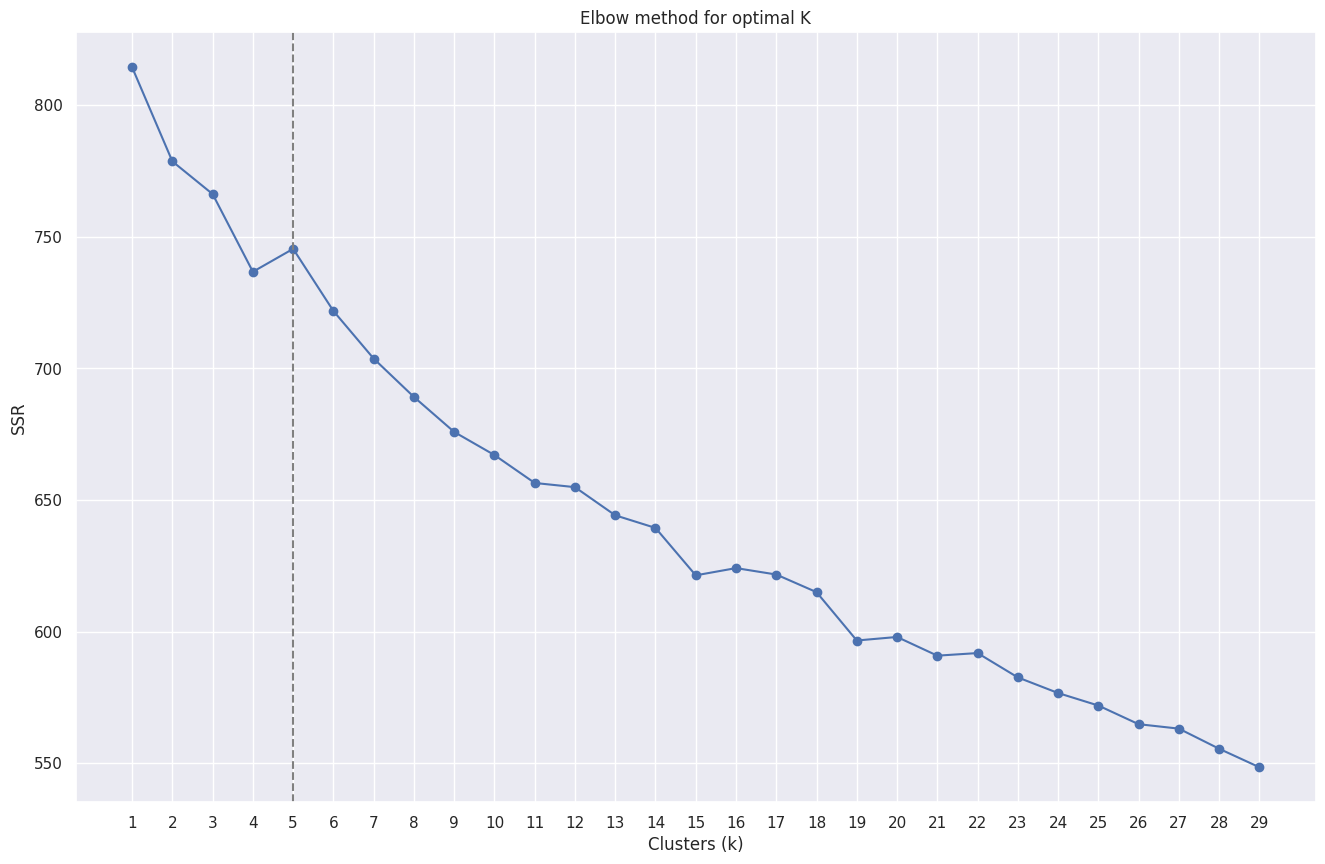

In [ ]:
# @title Warning TAKES FOREVER (DONT NEED)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ks = range(1,30)

ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)


    # append the inertial to a list
    ssr.append(model.inertia_)

# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()

**Cluster Generation**

Next up, we start generating the clusters by noting down the real number of groups we want to aim for. Then we concatenate the findings from our Bag of Words into a Pandas data frame.

In [ ]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(X_cv)
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
result['cluster'] = kmeans.predict(X_cv)
result[['Keywords','cluster']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Keywords,cluster
0,marijuana rescheduling,85
1,marijuana dispensary near me,30
2,marijuana gummies,65
3,marijuana kansas,78
4,marijuana legalization,54
5,marijuana moment,83
6,marijuana near me,3
7,marijuana ohio,28
8,marijuana plant,41
9,marijuana registry,25


> When you make a cluster analysis, it is imperative to compare matrices that have mutually exclusive data points. In other words, you can use SSE to compute a clustering task only on one single type of matrice due to their data format.

> For example, we used the bag of words which uses integers (0, 1, 2, etc.) to represent the occurrence of a word. Alternatively, we could have used the TF-IDF (as words or n-grams) using float (0.1,0.2,0.3) but we would have never mixed it up with any other matrices using different data values.

Now we can give a name to each cluster to improve readability.

To do so, we’re going to replace the numerical values with the related categorical value

In [ ]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Keywords' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

Next, we’re going to provide a numerical label for our new clusters so that we can be able to plot them accordingly

In [ ]:
pd.pivot_table(result_labelled,index=['label'],values=['Keywords'],aggfunc='count').sort_values(['Keywords'], ascending=False)

KeyError: ignored

The results show that at K=104 with the bag of words matrix, 104 out of 320 query names weren’t labelled, and 52 queries are in clusters of 1.

> **As a result, overall 33% of the query names were grouped into a clean cluster.**

Should we be satisfied? Not really.

This is genuinely what Google Autosuggest provided to us by default, meaning there is little to no room for cluster improvement. Nevertheless, you could well toy around with the number of clusters to see if you can minimize the outliers and aim to cluster as many queries as possible.

As far as I’m concerned, I’ve been trying with 150, 160, 80, 90 and even 60 to strike the right balance. Though, all I ever found was either too many query names left unlabelled (excluded from the clusterization) or too many unique clusters.

None of the solutions would have helped, hence I agreed to make a compromise towards leaving some query names out of the process and collecting a few unique clusters.

In [ ]:
# @title Plot the Clusters on a Treemap using Plotly

result_summary = pd.pivot_table(result_labelled,index=['label'],values=['Keywords'],aggfunc='count').reset_index().rename(columns={'Keywords':'count'})
result_treemap = result_summary[(result_summary['label'] != '') & (result_summary['count'] > 1)]
fig = px.treemap(result_treemap,path=['label'],values='count')
fig.show();

KeyError: ignored

What we can learn is that Google seems prone to suggest “Coffee” search queries that align with:

*   Local search (“Coffee near”, “coffee shop”)
*   Discovery prompt (“bean coffee”, “coffee machine”)
*   Commercial Investigation (“best coffee”, “coffee vs”,”coffee worst”)







---



**N-Grams Analysis on Top Queries**

If you want to push your Related Entities analysis down the root of semantics, we can start digging into NLP and see how it applies to our research.

Natural Language Processing (NLP) is one of the most interesting subsets of Machine Learning that should lure any SEO practitioner.

These sorts of tasks could apply in case you want to explore a dataset imbued with categorical data to serve either Entity analysis , Sentiment analysis or even competitor analysis.

However, the primary convenient task that comes out in style is n-gram analysis. In layman’s terms, what we are going to investigate now is what are the most common sequence of words within our bespoke list of Related Entities collected from Google Autosuggest.

Let’s start with importing the NLTK library to set up the NLP text analysis



In [ ]:
import nltk
textlist = expanded_results_df['Keywords'].to_list()
pd.Series(textlist).value_counts().head(10)

coffee near me          4
coffee maker            3
coffee bean             3
coffee cake recipe      3
coffee meets bagel      3
coffee shop             3
coffee machine          3
coffee shops near me    3
coffee table            3
coffee cake             3
dtype: int64

Next up, we intercept and remove stopwords to rinse up our text analysis

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Hence, import *Counter* to count related queries

In [ ]:
from collections import Counter
x = Counter(textlist)
x.most_common(10)

[('coffee near me', 4),
 ('coffee bean', 3),
 ('coffee shops near me', 3),
 ('coffee table', 3),
 ('coffee places near me', 3),
 ('coffee cake', 3),
 ('coffee maker', 3),
 ('coffee cake recipe', 3),
 ('coffee meets bagel', 3),
 ('coffee nearby', 3)]

And create a data frame including a list of bigrams and trigrams.

In [ ]:
#create dataframe with bigrams and trigrams
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3)) #can also select bigrams only

# matrix of ngrams
ngrams = c_vec.fit_transform(expanded_results_df['Keywords'])

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

Print the most frequent bigrams/trigrams for every related query with the frequency they occur on the SERP for “Coffee”

In [ ]:
df_ngram.head(20).style.background_gradient()

,frequency,bigram/trigram
0,25,coffee vs
1,17,coffee table
2,15,worst coffee
3,15,sale coffee
4,15,rent coffee
5,15,much coffee
6,15,best coffee
7,14,coffee machine
8,14,buy coffee
9,13,coffee shop


**SERP Analysis for a Specific Query**

Remember that nice query connecting coffee to weight loss?

It’s about time to use its potential for a proper SERP analysis.

In the last part of this tutorial, we assign the search query “what coffee is good for weight loss” to an API that will help us extract fleshy insights from the SERP.

**SERP Scraping: Snippets and About This Result**

What can you scrape by using the Serp Api applied to the search results page?

The good news is that you can extract plenty of hidden SERP features that normally other APIs or scraping tools don’t explore.

Here’s a quick peek at the low-hanging fruits achievable from the next scraping analysis:

**Feature	| Description**

* Position:	The ranking position of a URL in a given SERP

* Title:	A page’s title link as it appears on the SERP

* Link:	The webpage URL

* Breadcrumbs:	The path where users will find the exact result

* Date:	Just the last modified date of a webpage

* Snippet:	Any rich result that stands out in plain English (*If Any)

* Highlighted Words in Snippet: Any bolded word from the snippet (*If Any)

* About this Result:	A semantic prompt of the source of information according to Google

* About page:	A link to expand on the About This Result feature for the specific URL

* Cached page:	A cached version of a URL

* Related pages:	A link to a similar SERP to find similar information

First thing, we need to import the Google Search library from Serp Api and then upload the API key.

Bear in mind that you have to sign up and open a free account to get access to the API.

Next, we build the payload with the following parameters and enclose the results into a Pandas data frame.

* engine: specify the search engine you’ll be scraping from
* query: this is the query you want to search for
* location: the country you want to communicate the search is coming from
* lang: the language the query search is in
* num: how many results you want to be returned. 8 usually is the first page, 16 is two pages, etc, etc
* google_domain: the country-specific domain you want to search from (ex. google.com or google.fr). This usually aligns with some of the parameters above.
* gl: your target market where you can specify the country location further
* hl: the language of the target market, AKA the SERP

You can check the full Google Search API documentation for additional parameters.

In [ ]:
from serpapi import GoogleSearch
from google.colab import userdata


serp_apikey = userdata.get('SERP_API_KEY')

params = {
    "engine": "google",
    "q": "what coffee is good for weight loss",
    "location": "United Kingdom",
    "google_domain": "google.com",
    "gl": "uk",
    "hl": "en",
    "num": 10,
    "api_key": serp_apikey
}

client = GoogleSearch(params)
data = client.get_dict()

# access "organic results"
df = pd.DataFrame(data['organic_results'])
df.to_csv('data.csv', index=False)
df
! ls

 data.csv   results.csv   search_trends.csv
 files	    sample_data  'top relevance.csv'


In [ ]:
df

,position,title,link,displayed_link,favicon,date,snippet,snippet_highlighted_words,about_this_result,cached_page_link,source,sitelinks
0,1,10 Ways Coffee Can Help You Lose Weight,https://wearelittles.com/blogs/stories/10-ways...,https://wearelittles.com › blogs › stories › 1...,https://serpapi.com/searches/651ae5cf0a90c768f...,9 Jul 2021,"Amazingly, caffeine increases lipase, an enzym...",[caffeine increases lipase],{},https://webcache.googleusercontent.com/search?...,Flavoured Instant Coffee,NaN
1,2,Is Coffee Good For Weight Loss Or Does It Make...,https://www.womenshealthmag.com/weight-loss/a3...,https://www.womenshealthmag.com › weight-loss ...,https://serpapi.com/searches/651ae5cf0a90c768f...,12 Apr 2022,The bottom line: Plain black coffee may be ben...,[Plain black coffee],{},https://webcache.googleusercontent.com/search?...,Women's Health,NaN
2,3,Can Coffee and Lemon Help With Weight Loss ...,https://www.goodhousekeeping.com/health/diet-n...,https://www.goodhousekeeping.com › diet-nutrition,https://serpapi.com/searches/651ae5cf0a90c768f...,12 May 2023,Coffee and lemon each have benefits on their o...,[Coffee and lemon],{},https://webcache.googleusercontent.com/search?...,Good Housekeeping,NaN
3,4,How To Use Coffee To Lose Weight: The Top Do's...,https://www.mindbodygreen.com/articles/weight-...,https://www.mindbodygreen.com › articles › wei...,https://serpapi.com/searches/651ae5cf0a90c768f...,24 Apr 2023,"""For performance benefits8 , 2-6 mg of caffein...","[benefits8 , 2-6 mg of caffeine per kilogram o...",{},https://webcache.googleusercontent.com/search?...,MindBodyGreen,{'inline': [{'title': 'Coffee for weight loss'...
4,5,10 Best Coffee Hacks For Weight Loss,https://www.eatthis.com/coffee-hacks-weight-loss/,https://www.eatthis.com › Weight Loss,https://serpapi.com/searches/651ae5cf0a90c768f...,13 Dec 2020,"""Using half and half (20 calories per tablespo...",[Using half and half (20 calories per tablespo...,{},https://webcache.googleusercontent.com/search?...,Eat This Not That,NaN
5,6,Coffee and lemon for weight loss: Does it work?,https://www.medicalnewstoday.com/articles/coff...,https://www.medicalnewstoday.com › articles › ...,https://serpapi.com/searches/651ae5cf0a90c768f...,26 Apr 2023,Some evidence suggests that drinking coffee ma...,[coffee],{},https://webcache.googleusercontent.com/search?...,Medical News Today,NaN
6,7,Weight Loss Coffee,https://www.amazon.co.uk/weight-loss-coffee/s?...,https://www.amazon.co.uk › weight-loss-coffee ...,https://serpapi.com/searches/651ae5cf0a90c768f...,NaN,Nature's Finest by Nutrisslim OK! FatBurn Coff...,[FatBurn Coffee],{},https://webcache.googleusercontent.com/search?...,Amazon UK,NaN
7,8,"5 amazing ways coffee speeds up weight loss, a...",https://m.timesofindia.com/life-style/health-f...,https://m.timesofindia.com › ... › Health & Fi...,https://serpapi.com/searches/651ae5cf0a90c768f...,10 May 2021,"Weighing low on calories, coffee is also a wei...","[coffee, weight loss, benefits]",{},https://webcache.googleusercontent.com/search?...,The Times of India,NaN


In [ ]:
#remove special characters from values
Data = pd.read_csv('data.csv')
Data['snippet_highlighted_words'] =  Data['snippet_highlighted_words'].str.replace("\[|\"|\]", "")
Data['about_this_result'] = Data['about_this_result'].str.replace("{'source': {'description':", "")
Data['about_this_result'] = Data['about_this_result'].str.replace("https:\/\/serpapi.com\/searches\/6339f21a2c68788a45d8c065\/images\/\w*.png'}}", "")

#remove the first column that is mistakenly iterated win the process
Data = Data.iloc[: , 1:]

#fill NaN value
Data = Data.fillna(0)
Data.isnull().sum()
Data.head()

<ipython-input-71-28aad313fd10>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-71-28aad313fd10>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-71-28aad313fd10>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,title,link,displayed_link,favicon,date,snippet,snippet_highlighted_words,about_this_result,cached_page_link,source,sitelinks
0,10 Ways Coffee Can Help You Lose Weight,https://wearelittles.com/blogs/stories/10-ways...,https://wearelittles.com › blogs › stories › 1...,https://serpapi.com/searches/651ae5cf0a90c768f...,9 Jul 2021,"Amazingly, caffeine increases lipase, an enzym...",'caffeine increases lipase',{},https://webcache.googleusercontent.com/search?...,Flavoured Instant Coffee,0
1,Is Coffee Good For Weight Loss Or Does It Make...,https://www.womenshealthmag.com/weight-loss/a3...,https://www.womenshealthmag.com › weight-loss ...,https://serpapi.com/searches/651ae5cf0a90c768f...,12 Apr 2022,The bottom line: Plain black coffee may be ben...,'Plain black coffee',{},https://webcache.googleusercontent.com/search?...,Women's Health,0
2,Can Coffee and Lemon Help With Weight Loss ...,https://www.goodhousekeeping.com/health/diet-n...,https://www.goodhousekeeping.com › diet-nutrition,https://serpapi.com/searches/651ae5cf0a90c768f...,12 May 2023,Coffee and lemon each have benefits on their o...,'Coffee and lemon',{},https://webcache.googleusercontent.com/search?...,Good Housekeeping,0
3,How To Use Coffee To Lose Weight: The Top Do's...,https://www.mindbodygreen.com/articles/weight-...,https://www.mindbodygreen.com › articles › wei...,https://serpapi.com/searches/651ae5cf0a90c768f...,24 Apr 2023,"""For performance benefits8 , 2-6 mg of caffein...","'benefits8 , 2-6 mg of caffeine per kilogram o...",{},https://webcache.googleusercontent.com/search?...,MindBodyGreen,{'inline': [{'title': 'Coffee for weight loss'...
4,10 Best Coffee Hacks For Weight Loss,https://www.eatthis.com/coffee-hacks-weight-loss/,https://www.eatthis.com › Weight Loss,https://serpapi.com/searches/651ae5cf0a90c768f...,13 Dec 2020,"""Using half and half (20 calories per tablespo...",'Using half and half (20 calories per tablespo...,{},https://webcache.googleusercontent.com/search?...,Eat This Not That,0


Next, we can rename the columns to improve readability. Bear in mind you can’t append the following lines of code to the previous ones, so make sure to proceed in steps.

In [ ]:
cols = ['Position','Title','Link', 'Breadcrumbs', 'Date', 'Snippet', 'Highlighted Words in Snippet', 'About this Result','About page', 'Cached page', 'Related pages']
Data.columns = cols
Data.head()

,Position,Title,Link,Breadcrumbs,Date,Snippet,Highlighted Words in Snippet,About this Result,About page,Cached page,Related pages
0,10 Ways Coffee Can Help You Lose Weight,https://wearelittles.com/blogs/stories/10-ways...,https://wearelittles.com › blogs › stories › 1...,https://serpapi.com/searches/651ae5cf0a90c768f...,9 Jul 2021,"Amazingly, caffeine increases lipase, an enzym...",'caffeine increases lipase',{},https://webcache.googleusercontent.com/search?...,Flavoured Instant Coffee,0
1,Is Coffee Good For Weight Loss Or Does It Make...,https://www.womenshealthmag.com/weight-loss/a3...,https://www.womenshealthmag.com › weight-loss ...,https://serpapi.com/searches/651ae5cf0a90c768f...,12 Apr 2022,The bottom line: Plain black coffee may be ben...,'Plain black coffee',{},https://webcache.googleusercontent.com/search?...,Women's Health,0
2,Can Coffee and Lemon Help With Weight Loss ...,https://www.goodhousekeeping.com/health/diet-n...,https://www.goodhousekeeping.com › diet-nutrition,https://serpapi.com/searches/651ae5cf0a90c768f...,12 May 2023,Coffee and lemon each have benefits on their o...,'Coffee and lemon',{},https://webcache.googleusercontent.com/search?...,Good Housekeeping,0
3,How To Use Coffee To Lose Weight: The Top Do's...,https://www.mindbodygreen.com/articles/weight-...,https://www.mindbodygreen.com › articles › wei...,https://serpapi.com/searches/651ae5cf0a90c768f...,24 Apr 2023,"""For performance benefits8 , 2-6 mg of caffein...","'benefits8 , 2-6 mg of caffeine per kilogram o...",{},https://webcache.googleusercontent.com/search?...,MindBodyGreen,{'inline': [{'title': 'Coffee for weight loss'...
4,10 Best Coffee Hacks For Weight Loss,https://www.eatthis.com/coffee-hacks-weight-loss/,https://www.eatthis.com › Weight Loss,https://serpapi.com/searches/651ae5cf0a90c768f...,13 Dec 2020,"""Using half and half (20 calories per tablespo...",'Using half and half (20 calories per tablespo...,{},https://webcache.googleusercontent.com/search?...,Eat This Not That,0


In [ ]:
Data.to_csv('SERP.csv', index=False)

In [ ]:
# !cd '/content'
!cd ..

# Word Visualization

In [ ]:
!pip install google
!pip install trafilatura

import re
import pandas as pd
import numpy as np
import trafilatura
import pprint

In [ ]:
!pip install transformers
from transformers import pipeline

In [ ]:
uQuery_1 = "how strong is carbon" #@param {type:"string"}
uNum = 10

def getResults(uQuery, uTLD, uNum, uStart, uStop):
  try:
      from googlesearch import search
  except ImportError:
      print("No module named 'google' found")

  # What are we searching for
  query = uQuery

  # Prepare the data frame to store urls
  d = []

  for j in search(query, tld=uTLD, num=uNum, start=uStart, stop=uStop, pause=2):
      d.append(j)
      print(j)
  return d

results_1 = getResults(uQuery_1, "com", uNum, 1,uNum)

https://dragonplate.com/just-how-strong-is-carbon-fiber
https://www.quora.com/How-strong-is-carbon-fiber
https://www.quora.com/What-is-stronger-and-lighter-than-carbon-fiber
https://www.quora.com/Are-carbon-fiber-parts-really-stronger-and-lighter-than-metal-parts-AND-if-yes-how-much-stronger
https://www.quora.com/Is-carbon-fiber-stronger-than-steel-and-how-is-that-possible
https://www.quora.com/Is-it-disingenuous-to-say-carbon-fiber-is-several-times-stronger-than-steel-since-for-the-same-weight-carbon-fiber-is-also-several-times-thicker
https://www.motor1.com/news/603893/strength-test-carbon-fiber-steel-metals/
https://carbonfibergear.com/blogs/carbonfiber/how-strong-is-carbon-fiber
https://www.smicomposites.com/how-strong-is-carbon-fiber-a-closer-look/
https://www.polycase.com/techtalk/steel-enclosures/how-strong-is-carbon-steel.html


In [ ]:

results_1 = ['https://www.washingtonpost.com/sports/2023/10/01/taylor-swift-kelce-chiefs-jets/']
# type(results_1)


In [ ]:
pd.set_option('display.max_colwidth', None) # make sure output is not truncated (cols width)
pd.set_option("display.max_rows", 100) # make sure output is not truncated (rows)

def basicPreprocess(text): # Pre-processing
  try:
    processed_text = text.lower()
    processed_text = re.sub(r'\W +', ' ', processed_text)
    processed_text = re.sub(r'\\n', ' ', processed_text)
    processed_text = re.sub(r'<[^>]+>',' ', processed_text)
    processed_text = re.sub(r'\\xa0', ' ', processed_text)

  except Exception as e:
    print("Exception:",e,",on text:", text)
    return None
  return processed_text

def readResults(urls, query):
    # Prepare the data frame to store results
    x = []
    position = 0 # position on the serp

    # Loop items in results
    for page in urls:
       position += 1
       downloaded = trafilatura.fetch_url(page)
       if downloaded is not None: # assuming the download was successful
        result = trafilatura.extract(downloaded, include_tables=False, include_formatting=False, include_comments=False)
        result = basicPreprocess(result)
        x.append((page, result, query, position))
    return x

d = readResults(results_1, uQuery_1) # get results from there 1st query

df_1 = pd.DataFrame(d, columns=('url', 'result', 'query', 'position')) # store data in a data frame

df_final = pd.concat([df_1])
print("total number of articles (before filtering) ",len(df_final))

# Remove rows where result is empty
df_final['result'].replace(' ', np.nan, inplace=True)
df_final = df_final.dropna(subset=['result'])

# Remove rows where article are less than 200 characters in lenght
df_final = df_final[df_final['result'].apply(lambda x: len(str(x))>200)]


# Reindex df
df_final.index = range(len(df_final.index))

# Set the file name
uQuery = uQuery_1
cleanQuery = re.sub('\W+','', uQuery)
file_name = cleanQuery + ".csv"

total number of articles (before filtering)  1


In [ ]:
# Getting additional hourse power - adding more libraries
!pip install scattertext

%matplotlib inline
import scattertext as st
from sklearn.feature_extraction import _stop_words

import io
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

nlp = spacy.load('en_core_web_sm') # make sure you have the right language here

In [ ]:
df_1['top_result'] = ['Top 3' if x <= 3 else 'Positions 4 - 10' for x in df_1['position']] # add top_result = True when position <=3

# Remove rows where result is empty
df_1['result'].replace(' ', np.nan, inplace=True)
df_1 = df_1.dropna(subset=['result'])

df_1['index'] = df_1.index

df_1.groupby('top_result').apply(lambda x: x.result.apply(lambda x: len(x.split())).sum())
df_1['parsed'] = df_1.result.apply(nlp)

# Turn it into a Scattertext corpus
corpus_1 = (st.CorpusFromParsedDocuments(df_1,
                                       category_col='top_result',
                                       parsed_col='parsed')
          .build())

In [ ]:
html = produce_scattertext_explorer(corpus_1,
                                    category='Top 3',
                                    category_name='Top 3',
                                    not_category_name='Positions 4 - 10',
                                    width_in_pixels=900,
                                    minimum_term_frequency=3,
                                    term_significance = st.LogOddsRatioUninformativeDirichletPrior())
open("SERP-Visualization_top3.html", 'wb').write(html.encode('utf-8'))
display(HTML(html))

In [ ]:
df_final = corpus_1.get_term_freq_df()

df_final.head(25)

,Top 3 freq
term,
the,56
immovable,1
object,1
that,19
is,10
nfl,3
has,5
met,1
a,34


In [ ]:
df_entity =df_1[df_1['position'] < 6]

In [ ]:
# Remove rows where article are less than 300 characters in lenght
df_entity = df_entity[df_entity['result'].apply(lambda x: len(str(x))>300)]


# getting text ready by merging all pages together (no index)
full_body = df_entity[['result']].agg(''.join, axis=1).to_string(index=False).strip()

# cleaning up the text
full_body = basicPreprocess(full_body)

pp = pprint.PrettyPrinter(indent=35)

pp.pprint(full_body)

with open('output.txt', 'w') as text_file:
    text_file.write(full_body)

('the immovable object that is the nfl has met a new unstoppable force in '
 'taylor swift a collision of two worlds that came to prime time sunday night. '
 'in the first quarter swift was shown cheering enthusiastically for a kansas '
 'city touchdown it was scored by running back isiah pacheco not kelce but the '
 '“cruel summer singer appeared suitably impressed by the 48-yard effort later '
 'kelce acted as something of a decoy on a touchdown scored by fellow tight '
 'end noah gray as the chiefs took a large early lead that boded well for an '
 'enjoyable evening for swift and the many other chiefs fans on hand for the '
 'road game. the jets ended up turning the contest into a nail-biter but '
 'kansas city came away with a 23-20 victory the chiefs improved to 3-1 on the '
 'season and 2-0 when swift comes to see them in person. .@taylorswift13 was '
 'loving that @chiefs td  nfl (@nfl october 2 2023  #kcvsnyj on nbc⁰ stream on '
 '#nflplus https://t.co/cljq8moopx pic.twitter.co

In [ ]:
df_spacy_entities = pd.DataFrame(columns=['Entity','Type'])

nlp = spacy.load("en_core_web_sm")
doc = nlp(full_body)

for ent in doc.ents:
    df_spacy_entities = df_spacy_entities.append({"Entity":ent.text,"Type":ent.label_}, ignore_index=True)


df_spacy_entities.head()

In [ ]:
##Removing Duplicates from the DataFrame

df_spacy_entities = df_spacy_entities.drop_duplicates(subset=['Entity'])

df_spacy_entities.head()

,Entity,Type
0,taylor,PERSON
1,two,CARDINAL
2,sunday,DATE
3,night,TIME
4,the first quarter,DATE


In [ ]:
!pip install plotly==4.5
import plotly.express as px
import numpy as np

In [ ]:
fig_3 = px.treemap(df_spacy_entities, path=['Type','Entity'])
fig_3.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1139: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1139: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Other

In [ ]:
!pip3 install pyseoanalyzer


In [ ]:
# !seoanalyze https://www.washingtonpost.com/politics/2023/10/04/mccarthy-speaker-ouster-analysis/
from seoanalyzer import analyze
output = analyze('https://www.washingtonpost.com/politics/2023/10/04/mccarthy-speaker-ouster-analysis/')
output

In [ ]:
import json
import time

from operator import itemgetter
from seoanalyzer.website import Website

import urllib.request

In [ ]:
def cj_analyze(url, sitemap_url=None, analyze_headings=False, analyze_extra_tags=False, follow_links=True):
    start_time = time.time()

    def calc_total_time():
        return time.time() - start_time

    output = {'pages': [], 'keywords': [], 'errors': [], 'total_time': calc_total_time()}

    site = Website(url, sitemap_url, analyze_headings, analyze_extra_tags, follow_links)
    print(site)
    site.crawl()

    for p in site.crawled_pages:
        output['pages'].append(p.talk())

    output['duplicate_pages'] = [list(site.content_hashes[p]) for p in site.content_hashes if len(site.content_hashes[p]) > 1]
    print("-----------site")

    print(site)
    sorted_words = sorted(site.wordcount.items(), key=itemgetter(1), reverse=True)
    sorted_bigrams = sorted(site.bigrams.items(), key=itemgetter(1), reverse=True)
    sorted_trigrams = sorted(site.trigrams.items(), key=itemgetter(1), reverse=True)

    output['keywords'] = []

    for w in sorted_words:
        if w[1] > 4:
            output['keywords'].append({
                'word': w[0],
                'count': w[1],
            })

    for w, v in sorted_bigrams:
        if v > 4:
            output['keywords'].append({
                'word': w,
                'count': v,
            })

    for w, v in sorted_trigrams:
        if v > 4:
            output['keywords'].append({
                'word': w,
                'count': v,
            })

    # Sort one last time...
    output['keywords'] = sorted(output['keywords'], key=itemgetter('count'), reverse=True)

    output['total_time'] = calc_total_time()

    return output

output = cj_analyze('https://www.chrisjohnson.net')


In [ ]:


fp = urllib.request.urlopen("https://www.washingtonpost.com/politics/2023/10/04/mccarthy-speaker-ouster-analysis/")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

print(mystr)

In [ ]:
# @title Historic trends code
# from: https://colab.research.google.com/github/FrontAnalyticsInc/data-winners/blob/main/analysis-trends/trends-and-forecasts.ipynb#scrollTo=b989d7f4
# also has prediction forecasts with slope of trend

pytrend = TrendReq(requests_args=requests_args)

#provide your search terms
kw_list=['social media marketing', 'seo', 'content marketing','prompt engineering']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 12-m', geo='US')

# code - 2
trends = pytrend.interest_over_time()

# code - 3
trends[0:10]

# code - 4
# Visualize it
from matplotlib import pyplot
trends.plot()
pyplot.show()

# Gradio Interface

In [ ]:
!pip install -q gradio

In [ ]:
from difflib import Differ

import gradio as gr


def diff_texts(text1, text2):
    d = Differ()
    return [
        (token[2:], token[0] if token[0] != " " else None)
        for token in d.compare(text1, text2)
    ]


demo = gr.Interface(
    diff_texts,
    [
        gr.Textbox(
            label="Story Url",
            info="Full URL of wapo story you want to analyze for SEO.",
            lines=3,
            value="The quick brown fox jumped over the lazy dogs.",
        ),
        gr.Textbox(
            label="Text 2",
            info="Text to compare",
            lines=3,
            value="The fast brown fox jumps over lazy dogs.",
        ),
    ],
    gr.HighlightedText(
        label="Diff",
        combine_adjacent=True,
        show_legend=True,
        color_map={"+": "red", "-": "green"}),
    theme=gr.themes.Base()
)
if __name__ == "__main__":
    demo.launch()



# testing SEORD

In [ ]:

# from urllib.request import urlopen
# html = urlopen("http://www.google.com/").read()
# print(html)

In [ ]:
!pip install beautifulsoup4

from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://www.washingtonpost.com/sports/2023/10/01/taylor-swift-kelce-chiefs-jets/").read()

soup = BeautifulSoup(html)
print(soup.title.string)

Taylor Swift goes to Chiefs-Jets game to watch Travis Kelce on “Sunday Night Football” - The Washington Post


# AI Gradio test app

In [ ]:
import gradio
import requests
from bs4 import BeautifulSoup

In [ ]:
# @title Functions

def analyze_seo(url):
  """
  This function analyzes the SEO quality of a webpage.

  Args:
    url: The URL of the webpage to analyze.

  Returns:
    A dictionary with the SEO scores for the webpage.
  """

  # Get the HTML of the webpage.
  response = requests.get(url)
  html = response.content

  # Parse the HTML.
  soup = BeautifulSoup(html, "html.parser")

  # Get the internal links.
  internal_links = soup.find_all("a", href=lambda x: x.startswith("/"))

  # Get the headline.
  headline = soup.find("h1")

  # Get the meta description.
  meta_description = soup.find("meta", attrs={"name": "description"})

  # Analyze the internal links.
  internal_links_score = _analyze_internal_links(internal_links)

  # Analyze the headline.
  headline_score = _analyze_headline(headline)

  # Analyze the meta description.
  meta_description_score = _analyze_meta_description(meta_description)

  # Return the SEO scores.
  return {
      "internal_links": internal_links_score,
      "headline": headline_score,
      "meta_description": meta_description_score,
  }

def _analyze_internal_links(internal_links):
  """
  This function analyzes the internal links of a webpage.
  Args: internal_links: A list of the internal links on the webpage.
  Returns:A score for the internal links.
  """

  # Count the number of internal links.
  num_internal_links = len(internal_links)

  # Calculate the average number of paragraphs per internal link.
  avg_paragraphs_per_internal_link = len(soup.find_all("p")) / num_internal_links

  # Return the score for the internal links.
  score = "Red"
  if avg_paragraphs_per_internal_link <= 5:
    score = "Green"
  elif avg_paragraphs_per_internal_link <= 8:
    score = "Yellow"
  return {'score': score, 'value': avg_paragraphs_per_internal_link, 'suggestion': 'Ideally have 5 paragraphs per internal link.'}

def _analyze_headline(headline):
  """
  This function analyzes the headline of a webpage.
  Args: headline: The headline of the webpage.
  Returns: A score for the headline.
  """

  # Get the length of the headline.
  headline_length = len(headline.text)

  # Return the score for the headline.
  score = "Red"
  if headline_length <= 70:
    score = "Green"
  elif headline_length <= 80:
    score = "Yellow"
  return {'score': score, 'value': headline_length, 'suggestion': 'Ideally keep the headline 70 characters or less.'}

def _analyze_meta_description(meta_description):
  """ This function analyzes the meta description of a webpage.
  Args: meta_description: The meta description of the webpage.
  Returns: A score for the meta description. """

  # Get the length of the meta description.
  meta_description_length = len(meta_description.text)

  #Return the score for the meta description.
  score = "Red"
  if meta_description_length < 160 and meta_description_length > 50:
    score = "Green"
  elif meta_description_length <= 180:
    score = "Yellow"

  return {'score': score, 'value': meta_description_length, 'suggestion': 'Ideally keep the description between 50-160 characters or less.'}

In [ ]:
scoreObject = analyze_seo('https://www.washingtonpost.com/sports/2023/10/01/taylor-swift-kelce-chiefs-jets/')

In [ ]:
scoreObject['internal_links']

{'score': 'Green',
 'value': 2.888888888888889,
 'suggestion': 'Ideally have 5 paragraphs per internal link.'}

In [ ]:


# when function analyze_seo returns its scoreObject, render the results in html in the gradio outputs


# Create the Gradio interface.
interface = gradio.Interface(
    fn=analyze_seo,
    inputs=["text"],
    outputs=["html"],
    title="SEO Analyzer",
    description="This app analyzes the SEO quality of a webpage.",
)
# Launch the Gradio interface.
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3b6c8c24d7915a532d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
